In [2]:
import pandas as pd
import yfinance as yf
import numpy as np

In [44]:
google_prices = yf.download('goog',start='2022-06-01', end='2022-12-01')
google_prices.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,114.931503,117.399002,113.550499,114.137001,114.137001,28630000
2022-06-02,114.188004,117.898003,113.307999,117.746002,117.746002,27472000
2022-06-03,115.992500,116.364502,113.667999,114.564003,114.564003,25052000
2022-06-06,116.742500,119.398499,116.528297,117.010498,117.010498,23786000
2022-06-07,115.648003,117.748650,115.125504,117.229500,117.229500,26414000


In [225]:
import matplotlib.pyplot as plt


def calculate_ma(prices, window_1, window_2):
#   Calculating moving average
    moving_averages = {}
    moving_averages["m1"] = prices.rolling(window=window_1,min_periods=1).mean()
    moving_averages["m2"] = prices.rolling(window=window_2,min_periods=1).mean()
    return moving_averages

def get_positions(moving_averages,w1,w2):
#   position according to a relation between m1 and m2
    moving_averages["positions"] = []
    signals = np.where(moving_averages["m1"][w1:]>=moving_averages["m2"][w1:], 1, 0)
    zeros = np.zeros(w1)
    moving_averages["positions"] = np.append(zeros,signals)
#   our action: "1" - buy, "-1" - sell, "0" - keep position
    moving_averages["signals"] = np.append([0],np.diff(moving_averages["positions"],n=1))
#   diff between averages
    moving_averages["oscillator"] = moving_averages["m1"] - moving_averages["m2"]
    return moving_averages

def backtest(ticker, start_date, finish_date, window_1, window_2):
    prices = yf.download(ticker, start=start_date, end=finish_date)["Adj Close"]
    prices.plot(legend=True,label="price")
    
#   moving averages
    ma = calculate_ma(prices, window_1, window_2)
    ma["m1"].plot(legend=True,label="window: " + str(window_1))
    ma["m2"].plot(legend=True,label="window: " + str(window_2))
#   actions to make
    df = get_positions(ma, window_1, window_2)
    
#   calculating profit
    signals = df["signals"]
    pnl = []
    position = 0
    number_of_observations = len(df["signals"])

    for i in range(number_of_observations):
        action = df["signals"][i]
        if action == 0:
            continue
        if action == 1:
            pnl.append(-prices[i])
            position += 1
        if action == -1:
            pnl.append(prices[i])
            position -= 1
#   if by the end of the period we have an opened position, we want to close it
    pnl.append(position * prices[number_of_observations-1])
    return df["signals"], df["oscillator"]

[*********************100%***********************]  1 of 1 completed
total profit: -23.94751739501953


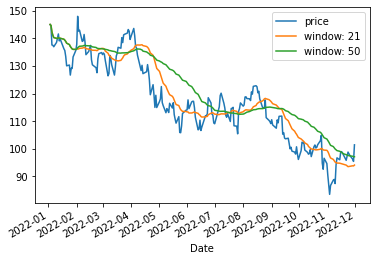

In [224]:
a,b = backtest("goog", '2022-01-01', '2022-12-01', 21, 50)

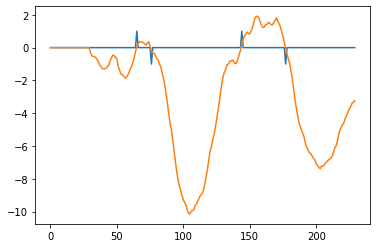

In [220]:
# Checking if the coding is correct
x = np.arange(0,len(a),1)
plt.plot(x,a)
plt.plot(x,b)
